In [1]:
import tensorflow as tf
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Cargar DataSet
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
train_data_path = '/content/drive/MyDrive/NLP/Genre Classification Dataset/train_data.txt'
test_data_path = '/content/drive/MyDrive/NLP/Genre Classification Dataset/test_data_solution.txt'

# Leer los archivos descargados en un DataFrame
df = pd.read_csv(train_data_path, sep=':::', engine='python', names=['Title', 'Genre', 'Description'])
df_test = pd.read_csv(test_data_path, sep=':::', engine='python', names=['Title', 'Genre', 'Description'])

# Mostrar las primeras filas del DataFrame
df_test


,Title,Genre,Description
1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),drama,Before he was known internationally as a mart...
...,...,...,...
54196,"""Tales of Light & Dark"" (2013)",horror,"Covering multiple genres, Tales of Light & Da..."
54197,Der letzte Mohikaner (1965),western,As Alice and Cora Munro attempt to find their...
54198,Oliver Twink (2007),adult,A movie 169 years in the making. Oliver Twist...
54199,Slipstream (1973),drama,"Popular, but mysterious rock D.J Mike Mallard..."


In [10]:
df.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

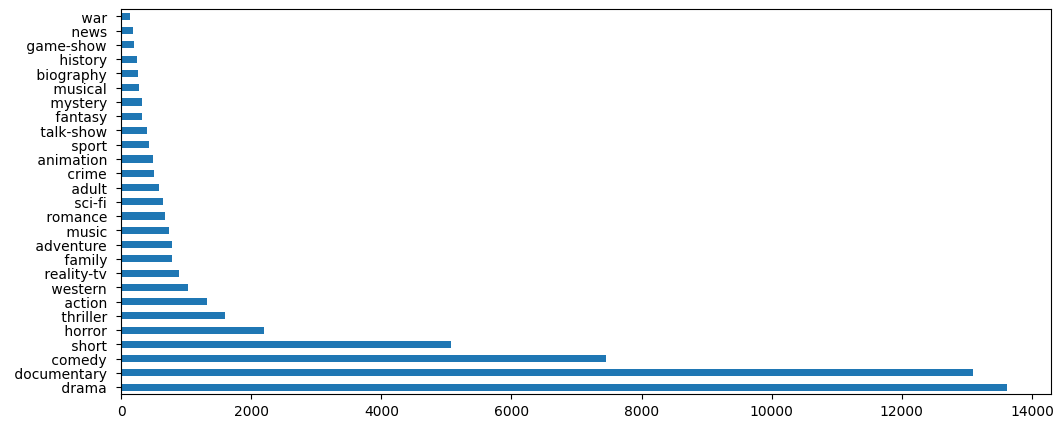

In [14]:
plt.figure(figsize=(12,5))
df['Genre'].value_counts().plot.barh()
plt.show()

In [15]:
df['description length']=df['Description'].apply(lambda x:len(x))   # calculating length of description for each row
df.head()

,Title,Genre,Description,description length
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625


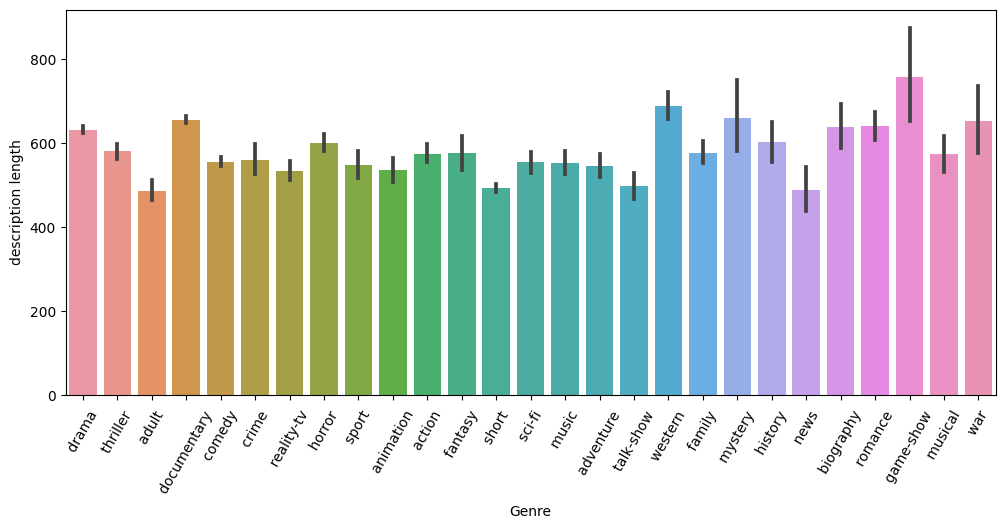

In [16]:
plt.figure(figsize=(12,5))
sns.barplot(x='Genre',y='description length',data=df)   # average length and its deviation for all classes
plt.xticks(rotation=60)
plt.show()

In [19]:
import re
import string
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer

stemmer = LancasterStemmer()
stopwords_list = stopwords.words('english')
def clean_text(text):
    text = re.sub('-', ' ', text.lower())   # replace `word-word` as `word word`
    text = ' '.join([stemmer.stem(word) for word in text.split() if word not in stopwords_list]) # remove stopwords and stem other words
    text = re.sub(f'[{string.digits}]', ' ', text)  # remove digits
    return re.sub(f'[{re.escape(string.punctuation)}]', '', text) # remove punctuations

print(f'Normal text: {"Certainly you get a dramatic boost from hello bye the the hi -iv iem-k q934*2yee !*3 2e38"}')
print(f"Cleaned text: {clean_text('Certainly you get a dramatic boost from hello bye the the hi -iv iem-k q934*2yee !*3 2e38')}")
stopwords_list

Normal text: Certainly you get a dramatic boost from hello bye the the hi -iv iem-k q934*2yee !*3 2e38
Cleaned text: certain get dram boost hello bye hi iv iem k q    yee    e  


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [18]:
df['Cleaned Description']=df.Description.apply(clean_text)  # clean text for all rows of description
df_test['Cleaned Description']=df_test.Description.apply(clean_text)
df['Cleaned Desc length']=df['Cleaned Description'].apply(lambda x:len(x))  # calculate length of cleaned text
df.head()

,Title,Genre,Description,description length,Cleaned Description,Cleaned Desc length
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546,list convers doct parents year old osc lear...,334
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184,broth sist past incestu rel cur murd relations...,87
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650,bus empty stud field trip muse nat history lit...,344
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082,help unemploy fath mak end meet edi twin sist ...,631
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625,films titl ref un recov body ground zero also ...,316


In [20]:
(df['Cleaned Desc length']>2000).value_counts()

False    54114
True       100
Name: Cleaned Desc length, dtype: int64

In [21]:
# Remove extremely long descriptions: outliers
print('Dataframe size (before removal): ',len(df))
filt=df['Cleaned Desc length']>2000
df.drop(df[filt].index,axis=0,inplace=True)     # filter rows having cleaned description length > 2000
print('Dataframe size (after removal): ',len(df))
print(f'Removed rows: {filt.sum()}')

Dataframe size (before removal):  54214
Dataframe size (after removal):  54114
Removed rows: 100


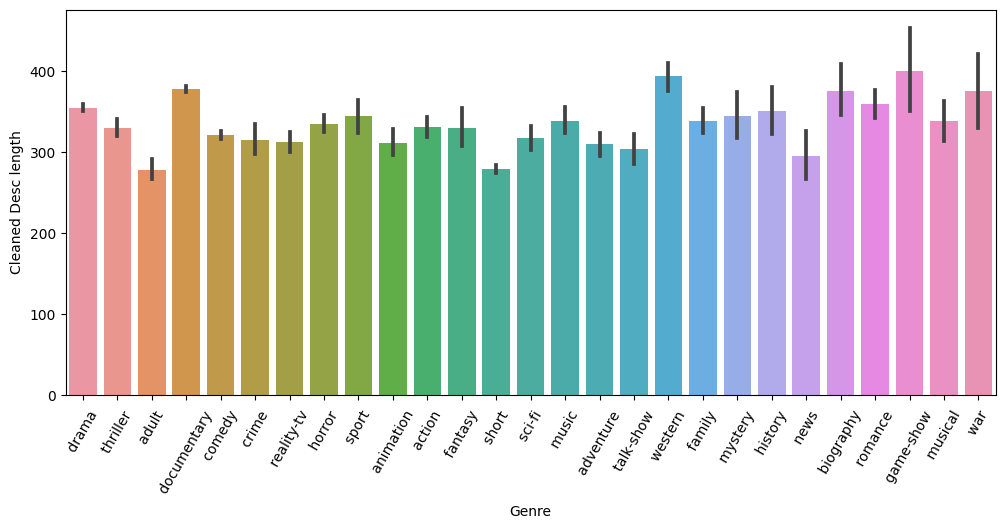

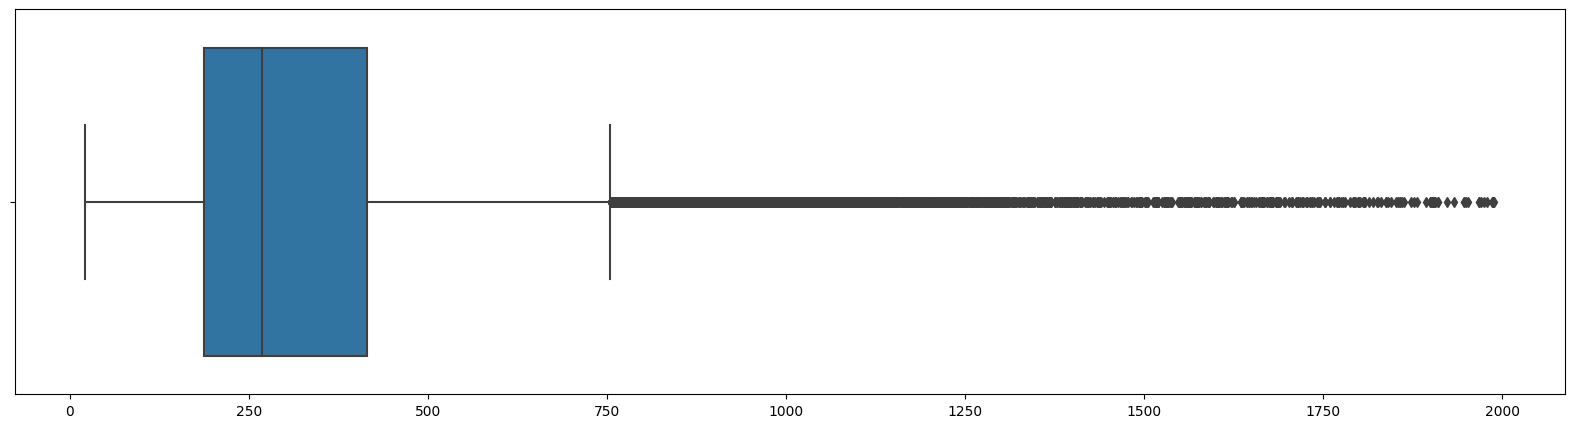

In [22]:
plt.figure(figsize=(12,5))
sns.barplot(x='Genre',y='Cleaned Desc length',data=df)  # from 600ish to 350ish -> significant reduction in length
plt.xticks(rotation=60)
plt.show()
plt.figure(figsize=(20,5))
sns.boxplot(x=df['Cleaned Desc length'].values,hue='Genre',data=df)
plt.show()

In [23]:
df.drop(columns=['Title','Description','description length','Cleaned Desc length'],axis=1,inplace=True)     # drop unnecessary columns for model
df_test.drop(columns=['Title','Description'],axis=1,inplace=True)
df.head()

,Genre,Cleaned Description
1,drama,list convers doct parents year old osc lear...
2,thriller,broth sist past incestu rel cur murd relations...
3,adult,bus empty stud field trip muse nat history lit...
4,drama,help unemploy fath mak end meet edi twin sist ...
5,drama,films titl ref un recov body ground zero also ...


In [24]:
from tensorflow.keras.layers import TextVectorization
# ******** hyperparameter ***********
vocab_size=20000

vectorize_layer=TextVectorization(max_tokens=vocab_size,output_sequence_length=386)
vectorize_layer.adapt(df['Cleaned Description'],batch_size=256)

print('Vocab size: ',vocab_size)
print(vectorize_layer.get_vocabulary()[:1001])
vectorize_layer

Vocab size:  20000
['', '[UNK]', 'on', 'film', 'new', 'liv', 'lif', 'story', 'find', 'tak', 'year', 'get', 'man', 'world', 'young', 'ev', 'two', 'lov', 'mak', 'work', 'com', 'us', 'friend', 'real', 'old', 'day', 'tim', 'becom', 'famy', 'first', 'wom', 'show', 'way', 'peopl', 'also', 'docu', 'girl', 'back', 'help', 'meet', 'act', 'follow', 'decid', 'life', 'look', 'art', 'end', 'want', 'lik', 'turn', 'son', 'three', 'him', 'car', 'marry', 'city', 'set', 'fin', 'play', 'see', 'lead', 'giv', 'hom', 'start', 'town', 'tel', 'kil', 'school', 'the', 'cre', 'fath', 'many', 'form', 'am', 'begin', 'discov', 'war', 'loc', 'off', 'sery', 'person', 'mus', 'go', 'long', 'journey', 'fal', 'nat', 'rel', 'return', 'tru', 'leav', 'know', 'un', 'night', 'forc', 'try', 'cal', 'fac', 'chang', 'moth', 'high', 'plac', 'around', 'must', 'group', 'mov', 'run', 'dream', 'includ', 'her', 'best', 'learn', 'secret', 'it', 'past', 'nam', 'boy', 'men', 'expery', 'fight', 'money', 'part', 'feat', 'them', 'wel', 'hum'

In [26]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()

x=vectorize_layer(df['Cleaned Description'])
x_test=vectorize_layer(df_test['Cleaned Description'])
y=encoder.fit_transform(df['Genre'])    # encode the genre labels to numbers
y_test=encoder.transform(df_test['Genre'])

print(f'X shape: {x.shape}, Y shape: {y.shape}')
num_classes=len(encoder.classes_)
print(f'Number of classes: {num_classes}')
print(encoder.classes_)

X shape: (54114, 386), Y shape: (54114,)
Number of classes: 27
[' action ' ' adult ' ' adventure ' ' animation ' ' biography ' ' comedy '
 ' crime ' ' documentary ' ' drama ' ' family ' ' fantasy ' ' game-show '
 ' history ' ' horror ' ' music ' ' musical ' ' mystery ' ' news '
 ' reality-tv ' ' romance ' ' sci-fi ' ' short ' ' sport ' ' talk-show '
 ' thriller ' ' war ' ' western ']


In [28]:
train_data=tf.data.Dataset.from_tensor_slices((x,y))  # tensorflow data processing pipeline
train_data=train_data.cache()
train_data=train_data.shuffle(50000)
train_data=train_data.batch(32)
train_data=train_data.prefetch(tf.data.AUTOTUNE)

data_test=tf.data.Dataset.from_tensor_slices((x_test,y_test))  # tensorflow data processing pipeline
data_test=data_test.cache()
data_test=data_test.shuffle(50000)
data_test=data_test.batch(32)
data_test=data_test.prefetch(tf.data.AUTOTUNE)
data_test=data_test.take(int(.2*len(data_test)))  # choosing only 20% of test data for validation

print(f'Train dataset size (with batches): {len(train_data)}')
print(f'Test dataset size (with batches): {len(data_test)}')

test_iterator=data_test.as_numpy_iterator()

_=test_iterator.next()
print(f'Data shape (with batches): {_[0].shape},{_[1].shape}')

Train dataset size (with batches): 1692
Test dataset size (with batches): 338
Data shape (with batches): (32, 386),(32,)


In [31]:
from tensorflow.keras.layers import Dropout,Embedding,Bidirectional,LSTM,Dense
from tensorflow.keras import Model,Input

# ******** hyperparameters *************
embedding_dim=128
lstm_cells=128

def build_model(dim):
    inputs=Input(shape=(dim,))
    x=Embedding(vocab_size,embedding_dim)(inputs)
    x=Dropout(.4)(x)
    x=Bidirectional(
        LSTM(lstm_cells,dropout=.4,return_sequences=True)
    )(x)
    x=LSTM(lstm_cells,dropout=.4)(x)
    x=Dense(num_classes,activation='softmax')(x)

    model=Model(inputs=inputs,outputs=x,name='genre_classifier')
    return model

genre_classifier=build_model(x.shape[-1])
genre_classifier.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)
genre_classifier.summary()

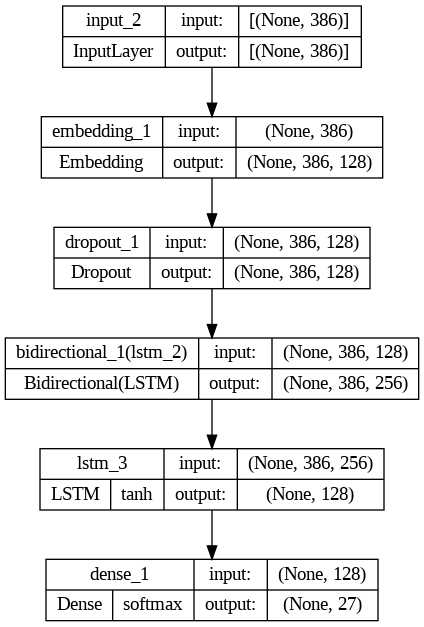

In [34]:
tf.keras.utils.plot_model(genre_classifier,show_shapes=True,show_layer_activations=True)

In [35]:
genre_classifier(x[:1])     # everything works fine

<tf.Tensor: shape=(1, 27), dtype=float32, numpy=
array([[0.0371597 , 0.03682283, 0.03700902, 0.03672679, 0.03743158,
        0.03729239, 0.03714148, 0.03689487, 0.03655804, 0.03723508,
        0.03644983, 0.03711198, 0.03684692, 0.0370752 , 0.03778461,
        0.03720192, 0.03789706, 0.03597623, 0.0364509 , 0.03726318,
        0.03741428, 0.03769604, 0.03651851, 0.03577382, 0.03778663,
        0.03740874, 0.03707233]], dtype=float32)>

In [ ]:
history=genre_classifier.fit(train_data,epochs=10,validation_data=data_test,callbacks=[
    tf.keras.callbacks.TensorBoard(log_dir='logs'),
    tf.keras.callbacks.ModelCheckpoint('ckpt',save_best_only=True,verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(verbose=1)
])

Epoch 1/10
1692/1692 [==============================] - ETA: 0s - loss: 2.3629 - accuracy: 0.2471
Epoch 1: val_loss improved from inf to 2.34337, saving model to ckpt


1692/1692 [==============================] - 3372s 2s/step - loss: 2.3629 - accuracy: 0.2471 - val_loss: 2.3434 - val_accuracy: 0.2543 - lr: 0.0100
Epoch 2/10
1692/1692 [==============================] - ETA: 0s - loss: 2.3545 - accuracy: 0.2483
Epoch 2: val_loss did not improve from 2.34337
1692/1692 [==============================] - 3217s 2s/step - loss: 2.3545 - accuracy: 0.2483 - val_loss: 2.3511 - val_accuracy: 0.2445 - lr: 0.0100
Epoch 3/10
1692/1692 [==============================] - ETA: 0s - loss: 2.3554 - accuracy: 0.2483
Epoch 3: val_loss improved from 2.34337 to 2.33323, saving model to ckpt


1692/1692 [==============================] - 3411s 2s/step - loss: 2.3554 - accuracy: 0.2483 - val_loss: 2.3332 - val_accuracy: 0.2470 - lr: 0.0100
Epoch 4/10
1692/1692 [==============================] - ETA: 0s - loss: 2.3553 - accuracy: 0.2491
Epoch 4: val_loss did not improve from 2.33323
1692/1692 [==============================] - 3306s 2s/step - loss: 2.3553 - accuracy: 0.2491 - val_loss: 2.3544 - val_accuracy: 0.2462 - lr: 0.0100
Epoch 5/10
1692/1692 [==============================] - ETA: 0s - loss: 2.3551 - accuracy: 0.2490
Epoch 5: val_loss did not improve from 2.33323
1692/1692 [==============================] - 3211s 2s/step - loss: 2.3551 - accuracy: 0.2490 - val_loss: 2.3385 - val_accuracy: 0.2420 - lr: 0.0100
Epoch 6/10
1692/1692 [==============================] - ETA: 0s - loss: 2.3600 - accuracy: 0.2486
Epoch 6: val_loss did not improve from 2.33323
1692/1692 [==============================] - 3325s 2s/step - loss: 2.3600 - accuracy: 0.2486 - val_loss: 2.3462 - val_acc